In [2]:
from pynucastro import Library, PythonNetwork, ReacLibLibrary, Composition, RateCollection
from pynucastro.rates import DerivedRate
import matplotlib.pyplot as plt
plt.rcParams['savefig.bbox']='tight'
plt.tight_layout()

<Figure size 600x400 with 0 Axes>

## Writing a network with `DerivedRate`

In this section we will write a network near the iron group, based on the end of approx21 Frank Timmes's network. In principle we can add more nuclei into the network to match the integration with the mass fractions computed under NSE state. In this case, we have introduced extra nuclei to keep the mass fraction absolute differences $\lesssim 10^{-2}$.

In order to turn on the screening while writing the network, and the use partition function feature, we setup the variables `with_pf=True` and `with_screening=True`.

In [3]:
with_pf = True
with_screening = True

Let us start writing the network. We start removing all the `-w` weak and `-v` inverse reaclib rates, from the whole library. Then we list and link the nuclei of our network. Furthermore, we create one `DerivedRate` object for each reaclib `Rate` we filtered. Finally we combine both libraries into `full_library`.

In [4]:
all_reactions = ReacLibLibrary()
fwd_reactions = all_reactions.derived_forward()

all_nuclei = ['n', 'p', 'he4', 'cr48', 'cr49', 'cr55', 'cr56', 'mn51', 
              'mn52', 'mn53', 'mn54', 'mn55',  'mn56', 'fe52', 'fe53', 
              'fe54', 'fe55', 'fe56', 'co55', 'co56', 'ni56']

fwd_rates_lib = fwd_reactions.linking_nuclei(nuclist=all_nuclei, with_reverse=False)

derived = []
for r in fwd_rates_lib.get_rates():
    d = DerivedRate(rate=r, compute_Q=False, use_pf=with_pf)
    derived.append(d)

der_rates_lib = Library(rates=derived)
full_library = fwd_rates_lib + der_rates_lib

# print(full_library)

Now we create a `RateCollection` object from the previous library and plot the network:

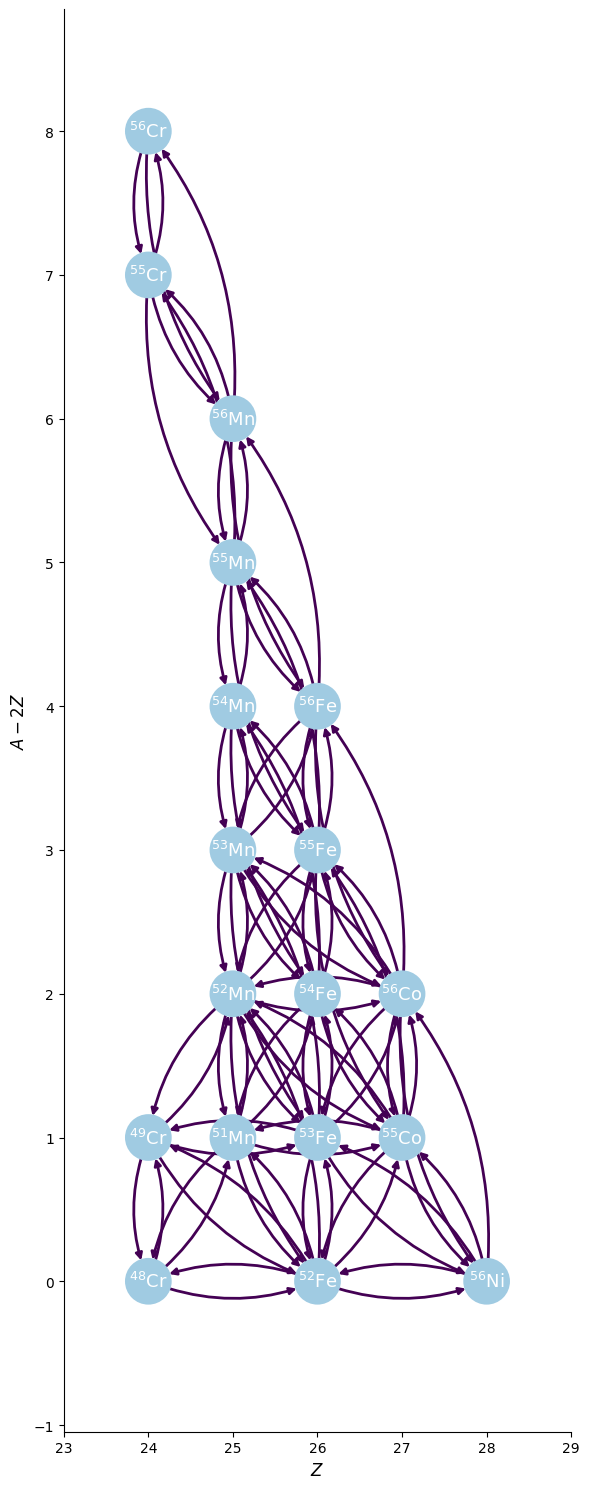

In [5]:
rc_raw = RateCollection(libraries=full_library)
rc_raw.plot(outfile='derived_network.pdf', rotated=True, curved_edges=True, size=(600,1500))

Finally, we write this python network as `full_nuclide_ap21.py` :

In [6]:
pynet = PythonNetwork(libraries=full_library, symmetric_screening=False, do_screening=with_screening)
pynet.write_network('full_nuclide_ap21.py')

# Writing the default network

In this case we have excluded the weak rates and linked the same list of nuclei defined in the previous network, including the reaclib inverse rates.

In [7]:
all_reactions = ReacLibLibrary()

all_nuclei = ['n', 'p', 'he4', 'cr48', 'cr49', 'cr55', 'cr56', 'mn51', 
              'mn52', 'mn53', 'mn54', 'mn55',  'mn56', 'fe52', 'fe53', 
              'fe54', 'fe55', 'fe56', 'co55', 'co56', 'ni56']

full_library = all_reactions.linking_nuclei(nuclist=all_nuclei, with_reverse=True)

rates = []
for r in full_library.get_rates():
    if r.weak:
        continue
    else:
        rates.append(r)

full_library = Library(rates=rates)

#print(full_library)

Now, we create the `RateCollection` object and plot the network. Note that the plot looks equal with respect to the previous network.

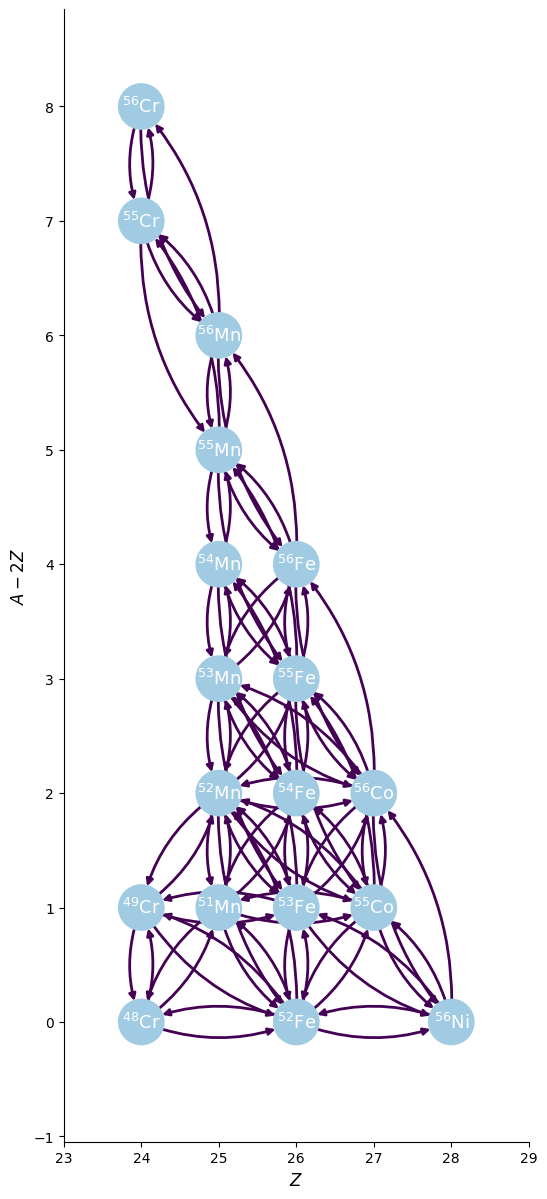

In [8]:
rc_raw = RateCollection(libraries=full_library)
rc_raw.plot(rotated=True, curved_edges=True, size=(600,1500))

Finally, we write this network as `full_nuclide_ap21_r.py` :

In [9]:
pynet = PythonNetwork(libraries=full_library, symmetric_screening=False, do_screening=with_screening)
pynet.write_network('full_nuclide_ap21_r.py')